#Орищенко Виталий
#@Vitosh992

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(method = 'ffill')
df['Cabin'] = df['Cabin'].fillna(method = 'bfill')
df['Embarked'] = df['Embarked'].fillna(method = 'ffill')
df['Embarked'] = df['Embarked'].fillna(method = 'bfill')

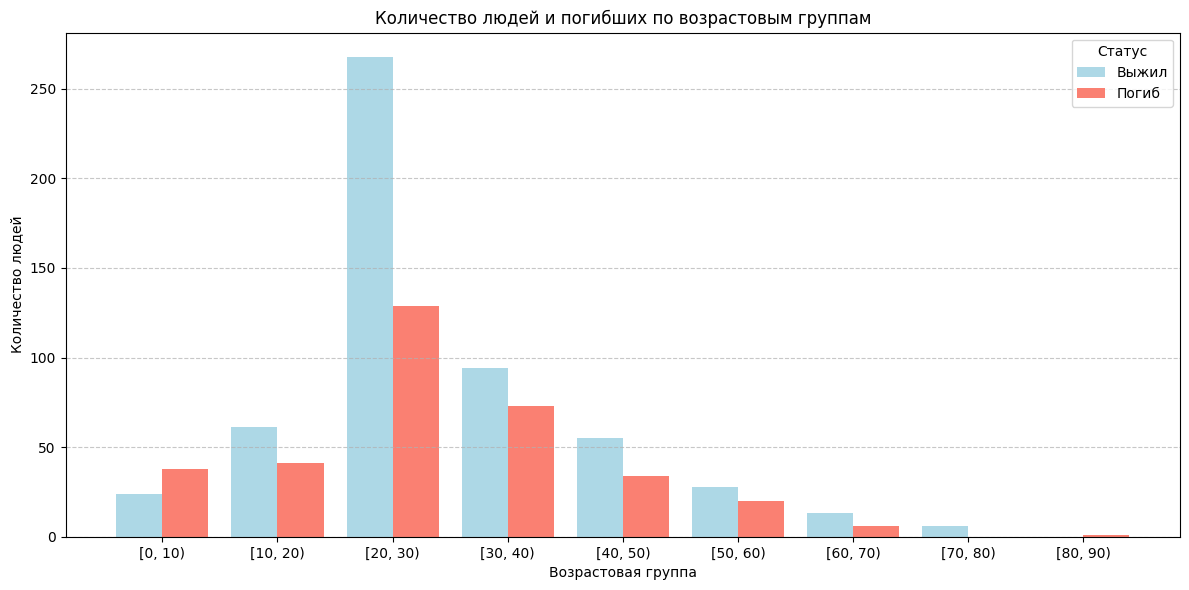

In [18]:
def age_group(age): # Создаем функция для автоматического определения осей групп выборки
    return f"[{int(age // 10) * 10}, {int(age // 10) * 10 + 10})"

df['Age_Group'] = df['Age'].apply(age_group) # Разделяем выборку по группам
age_survival_counts = df.groupby(['Age_Group', 'Survived']).size().unstack(fill_value=0)
age_groups = np.unique(df['Age_Group'])
bar_width = 0.4 # Настраиваем вид будущего графика и подписи всех осей
bar_positions = np.arange(len(age_groups))
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, age_survival_counts[0], width=bar_width, color='lightblue', label='Количество людей')
plt.bar(bar_positions + bar_width, age_survival_counts[1], width=bar_width, color='salmon', label='Количество погибших')
plt.xlabel("Возрастовая группа") # Названия осей x, y
plt.ylabel("Количество людей")
plt.title("Количество людей и погибших по возрастовым группам")
plt.xticks(bar_positions + bar_width / 2, labels=age_groups)
plt.legend(title="Статус", labels=["Выжил", "Погиб"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Показываем график

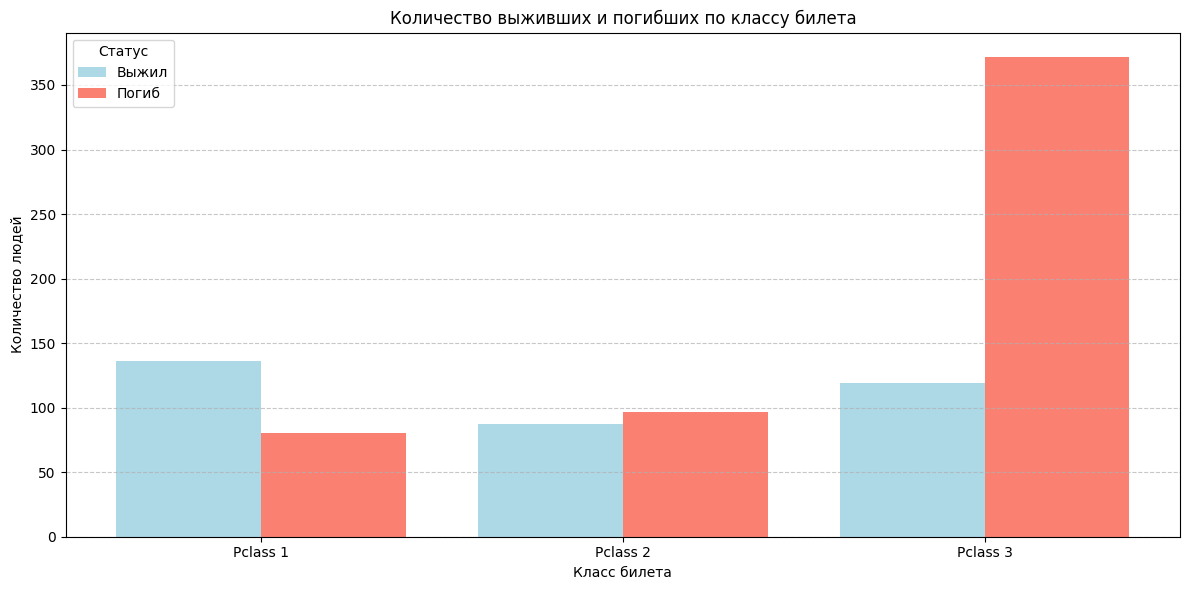

In [19]:
df['Pclass'] = df['Pclass'].astype(str) # Далее для каждой пары рассматриваемых признаков идентично будем строить график
def survival_by_pclass(row):
    return f"Pclass {row['Pclass']}"
df['Pclass_Group'] = df.apply(survival_by_pclass, axis=1)
pclass_survival_counts = df.groupby(['Pclass_Group', 'Survived']).size().unstack(fill_value=0)
pclass_groups = np.unique(df['Pclass_Group'])
bar_width = 0.4
bar_positions = np.arange(len(pclass_groups))
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, pclass_survival_counts[1], width=bar_width, color='lightblue', label='Выжил')
plt.bar(bar_positions + bar_width, pclass_survival_counts[0], width=bar_width, color='salmon', label='Погиб')
plt.xlabel("Класс билета")
plt.ylabel("Количество людей")
plt.title("Количество выживших и погибших по классу билета")
plt.xticks(bar_positions + bar_width / 2, labels=pclass_groups)
plt.legend(title="Статус", labels=["Выжил", "Погиб"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

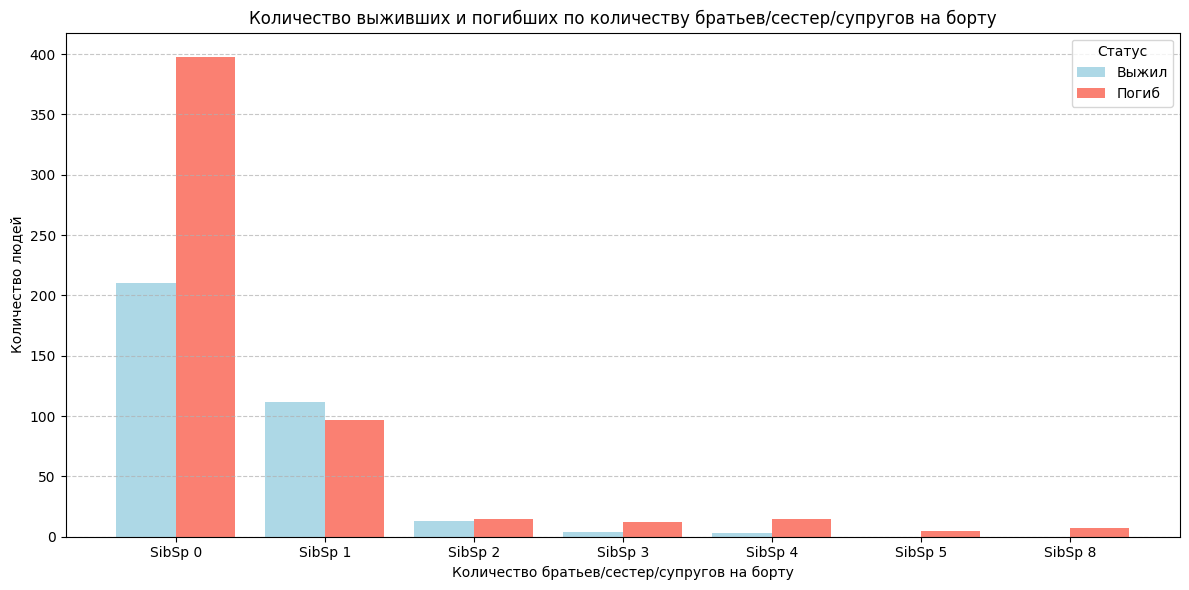

In [20]:
df['SibSp'] = df['SibSp'].astype(str)
def survival_by_sibsp(row):
    return f"SibSp {row['SibSp']}"

df['SibSp_Group'] = df.apply(survival_by_sibsp, axis=1)
sibsp_survival_counts = df.groupby(['SibSp_Group', 'Survived']).size().unstack(fill_value=0)
sibsp_groups = np.unique(df['SibSp_Group'])
bar_width = 0.4
bar_positions = np.arange(len(sibsp_groups))
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, sibsp_survival_counts[1], width=bar_width, color='lightblue', label='Выжил')
plt.bar(bar_positions + bar_width, sibsp_survival_counts[0], width=bar_width, color='salmon', label='Погиб')
plt.xlabel("Количество братьев/сестер/супругов на борту")
plt.ylabel("Количество людей")
plt.title("Количество выживших и погибших по количеству братьев/сестер/супругов на борту")
plt.xticks(bar_positions + bar_width / 2, labels=sibsp_groups)
plt.legend(title="Статус", labels=["Выжил", "Погиб"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

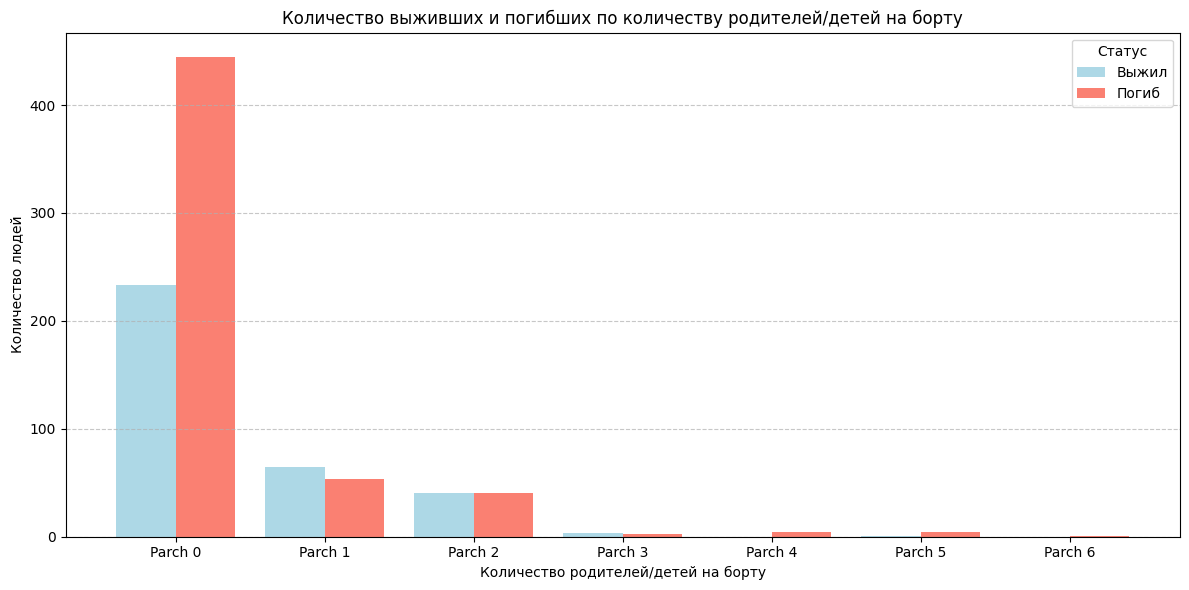

In [21]:
def survival_by_parch(row):
    return f"Parch {row['Parch']}"

df['Parch_Group'] = df.apply(survival_by_parch, axis=1)
parch_survival_counts = df.groupby(['Parch_Group', 'Survived']).size().unstack(fill_value=0)
parch_groups = np.unique(df['Parch_Group'])
bar_width = 0.4
bar_positions = np.arange(len(parch_groups))
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, parch_survival_counts[1], width=bar_width, color='lightblue', label='Выжил')
plt.bar(bar_positions + bar_width, parch_survival_counts[0], width=bar_width, color='salmon', label='Погиб')
plt.xlabel("Количество родителей/детей на борту")
plt.ylabel("Количество людей")
plt.title("Количество выживших и погибших по количеству родителей/детей на борту")
plt.xticks(bar_positions + bar_width / 2, labels=parch_groups)
plt.legend(title="Статус", labels=["Выжил", "Погиб"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

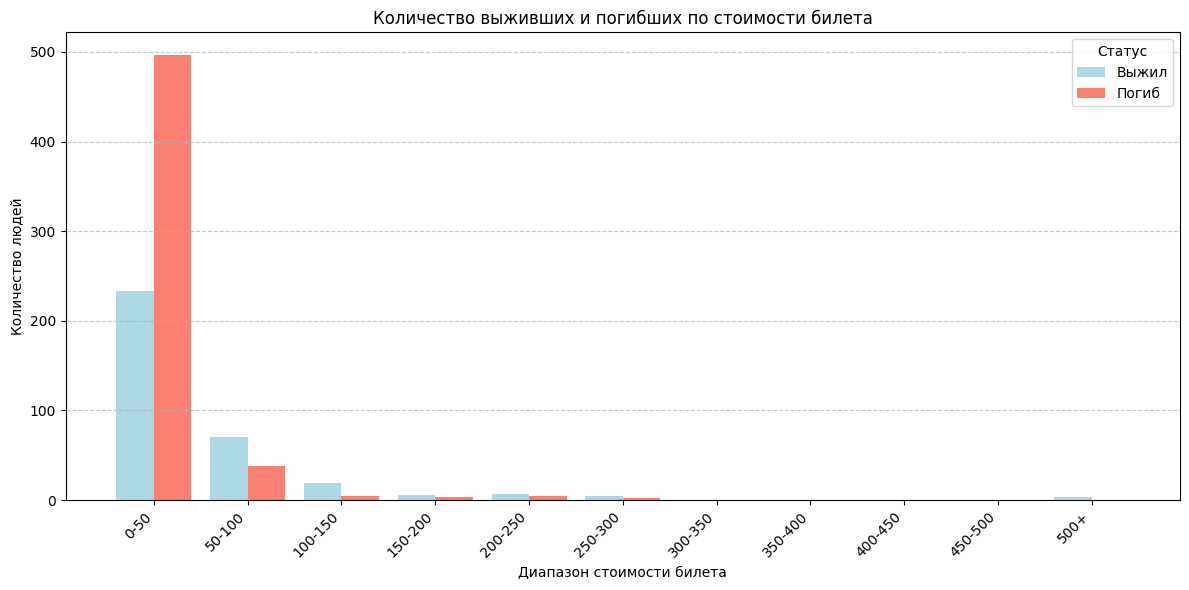

In [22]:

fare_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf] # В этом случае будем разбивать нашу выборку на промежутки в 50 единиц цены
fare_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']
df['Fare_Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
fare_survival_counts = df.groupby(['Fare_Group', 'Survived']).size().unstack(fill_value=0)
fare_groups = fare_survival_counts.index
bar_width = 0.4
bar_positions = np.arange(len(fare_groups))
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, fare_survival_counts[1], width=bar_width, color='lightblue', label='Выжил')
plt.bar(bar_positions + bar_width, fare_survival_counts[0], width=bar_width, color='salmon', label='Погиб')
plt.xlabel("Диапазон стоимости билета")
plt.ylabel("Количество людей")
plt.title("Количество выживших и погибших по стоимости билета")
plt.xticks(bar_positions + bar_width / 2, labels=fare_groups, rotation=45, ha='right')
plt.legend(title="Статус", labels=["Выжил", "Погиб"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

По графикам прослеживается та же тенденция, что была определена в прошлом задании. Коэффициент корреляции Пирсона для каждой пары элементов дал аналогичное описание ситуации с выборкой. Однако на графике можно проследить конкретные тенденции для каждой группы в выбранной паре, что, например, при числовой статистике определить невозможно.